In [2]:
from Tkinter import *
import Tkinter, Tkconstants, tkFileDialog

import numpy as np 
import os
import sys

from h5py import File

import matplotlib
matplotlib.use('TkAgg') #Not case-sensitive
#%matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import holoviews as hv
import datashader as ds
from holoviews.operation.datashader import datashade
import datashader.transfer_functions as tf
hv.extension('bokeh')

OSError: /usr/lib/python2.7/site-packages/llvmlite-0.21.0-py2.7.egg/llvmlite/binding/libllvmlite.so: cannot open shared object file: No such file or directory

In [4]:
#Let the user select a dataset and open the h5 file
root = Tk()
root.withdraw()#Remove the root window from the screen without removing it
path = tkFileDialog.askopenfilename(initialdir = "/home/user/Desktop/Data")
root.destroy()
print path

()


In [33]:
stim_list = []
for i in f:
    routed_electrodes = np.asarray(f[j]['elnum']['values'][:])
    x = routed_electrodes%220
    y = routed_electrodes/220
    el_array=np.zeros((120,220))
    el_array[y,x]=1
    
    chosen_el, el_array = manual_annot(el_array)
    stim_list.append(chosen_el)

In [ ]:
def manual_anot(el_array):
    
    #Calling ginput to interactively select electrodes
    fig=plt.figure(figsize=(22,12))
    imgplot = plt.imshow(el_array[:,:],'hot')
    plt.title('left click: add point | right click: remove last point | middle click: stop input')
    plt.show(block=False)
    points = np.around(np.asarray(plt.ginput(n=200,show_clicks=True,mouse_add=1,mouse_pop=3,mouse_stop=2)))
    plt.close()
    
    #Convert the coordinates into ints
    xses=map(int,[t[0] for t in points])
    yses=map(int,[t[1] for t in points])
    el_array[yses,xses]=0.5
        
    el_grid=np.reshape(np.arange(26400),(120,220))
    chosen_el = el_grid[yses,xses]
    return chosen_el, el_array

In [36]:
def saveFig(el_array):
    pix=len(np.where(el_array==200)[0])
    fig=plt.figure(figsize=(22,12))
    ax=fig.add_subplot(111)
    ax.imshow(el_array[:,:],'hot')
    plt.title(str(pix)+' electrodes are chosen')
    plt.savefig(filepath+'electrodes/'+'structure_'+str(ch)+'.jpg',bbox_inches='tight',pad_inches=0)
    plt.close()

[[46, 45]]

In [38]:
el_grid=np.reshape(np.arange(26400),(120,220))
chosen = el_grid[yses[0],xses[0]]
print chosen

[21166 14785]


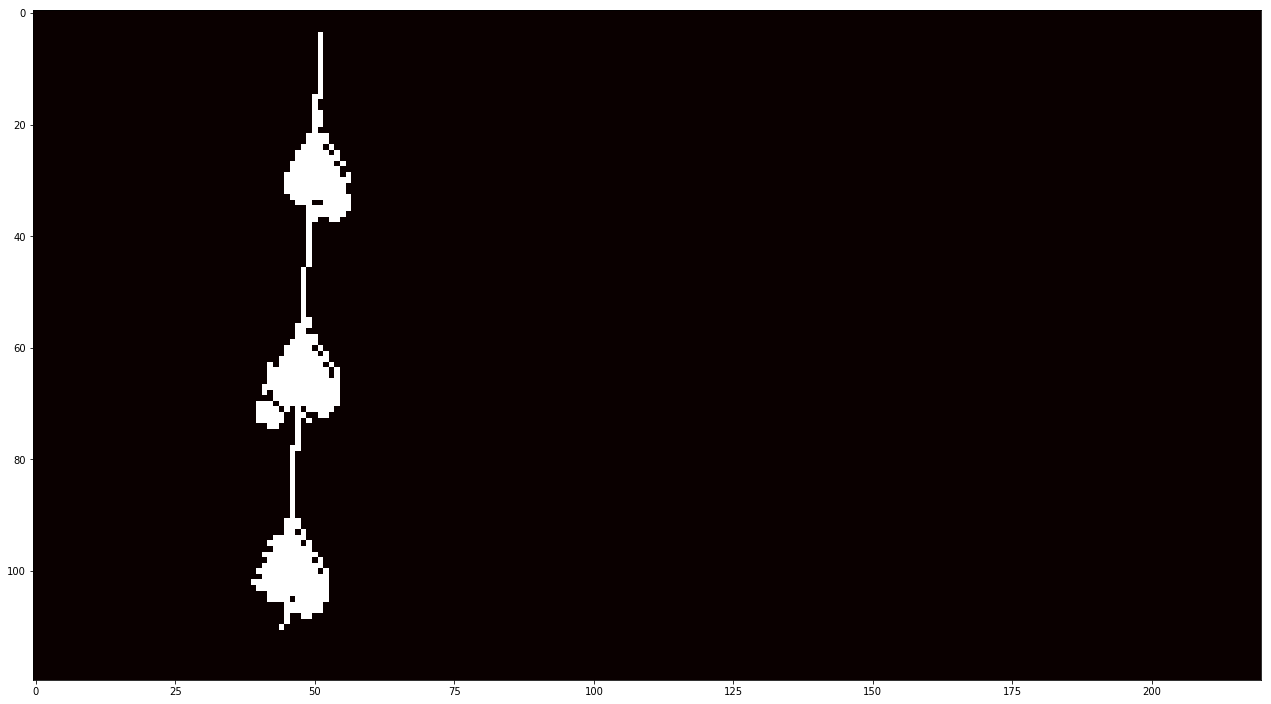

In [13]:
#Plot the config
%matplotlib inline
fig=plt.figure(figsize=(22,13))
ax=fig.add_subplot(111)
ax.imshow(el_array,'hot',interpolation='nearest')
plt.show()

Using matplotlib backend: Qt5Agg


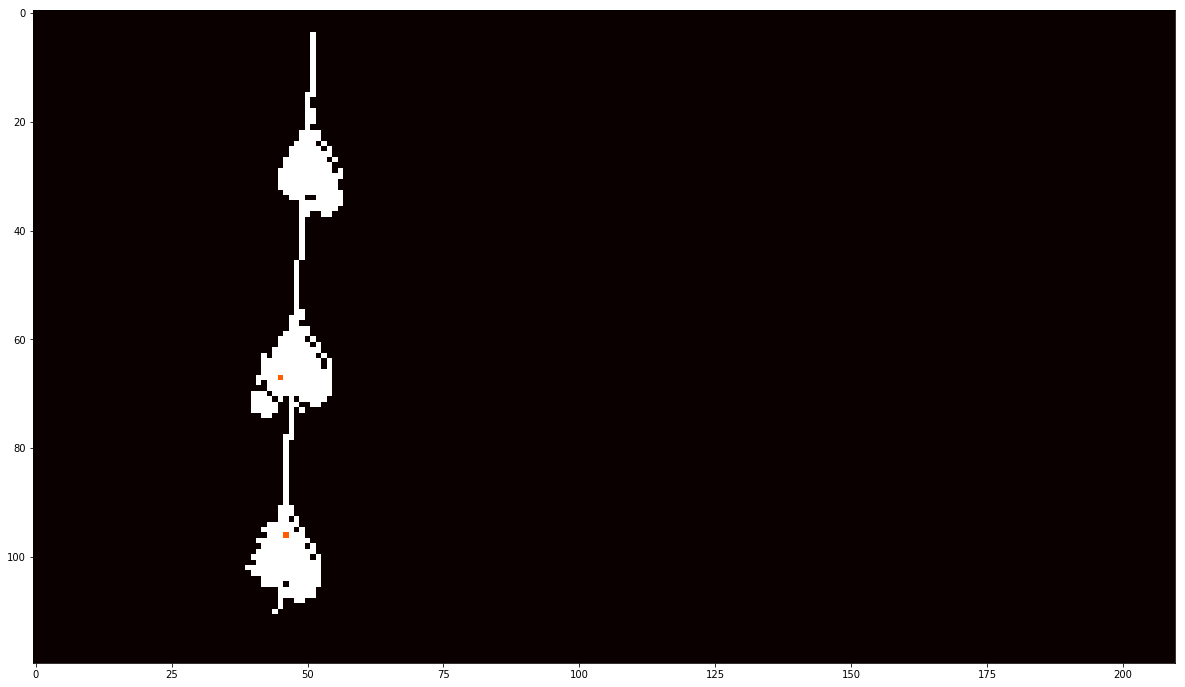

In [14]:
#Let the user choose an electrode
%matplotlib
xses=[]
yses=[]
for i in range(1):
    fig=plt.figure(figsize=(22,12))
    imgplot = plt.imshow(el_array,'hot')
    points = np.around(np.asarray(plt.ginput(n=200,show_clicks=True,mouse_add=1,mouse_pop=3,mouse_stop=2)))
    plt.close()
    xses.append(map(int,[t[0] for t in points]))
    yses.append(map(int,[t[1] for t in points]))
    el_array[yses[i],xses[i]]=0.5
    
%matplotlib inline
fig=plt.figure(figsize=(22,12))
imgplot = plt.imshow(el_array[:,:-10],'hot')

In [54]:
#Import the information about the electrodes: Which electrodes are recorded? Where are they located?

el_array=np.zeros((120,220))

#Create x and y matrices containing all coordinates
x,y=(np.arange(220),np.arange(120))
x_el,y_el=np.meshgrid(x,y)
x_el_flat,y_el_flat=(np.reshape(x_el,(1,26400))[0],np.reshape(y_el,(1,26400))[0])
cor_flat=zip(x_el_flat,y_el_flat)

#Electrode contains all electrodes indeces of all traces
electrode=[]
cor_el_all=[]
xs_all=[]
ys_all=[] 
for i in range(len(f)):
    indeces=[el[0] for el in f['structure_'+str(i+1)]['elnum']['block0_values']]
    electrode.append(indeces)
    cor_el=np.asarray(cor_flat)[electrode[i]]
    cor_el_all.append(cor_el)
    xs=[t[0] for t in cor_el]
    ys=[t[1] for t in cor_el]
    xs_all.append(xs)
    ys_all.append(ys)
    el_array[ys,xs]=1

In [73]:
choosen_el=[]
for u in range(len(f)):
    subel=[]
    for j in range(len(xses[u])):
        indices_x = [i for i, x in enumerate(xs_all[u]) if x == xses[u][j]]
        indices_y = [i for i, y in enumerate(ys_all[u]) if y == yses[u][j]]
        intersection = list(set(indices_x).intersection(indices_y))[0]
        subel.append(electrode[u][intersection])
    choosen_el.append(subel)
print choosen_el

NameError: name 'xs_all' is not defined

In [3]:
#Linear indeces of boxes in the first HEX-files of the 28x6x6 config
box_size=6
jump_size=30
sx,sy=7,4
cx,cy=5,5
side=np.arange(box_size)
xx,yy=np.meshgrid(side,side)
xx_list=[]
yy_list=[]
'''
for i in range(sx):
    for j in range(sy):
        xx_list.append(xx+jump_size*i)
        yy_list.append(yy+jump_size*j)
linear_index_of_boxes=[xx_list[i]+yy_list[i]*220 for i in range(sx*sy)]
'''
box_coord = [[[xx+u*box_size+jump_size*i,yy+p*box_size+jump_size*j] for i in range(sx) for j in range(sy)] for u in range(cx) for p in range(cy)]
linear_index_of_boxes = [[box_coord[j][i][0]+box_coord[j][i][1]*220 for i in range(sx*sy)] for j in range(cx*cy)]

In [93]:
#Linear indices of stimulation electrodes using the 28x6x6 HEX-files
box_size=6
jump_size=30
sx,sy=7,4
cx,cy=5,5
stim_x,stim_y=3,3

'''
Alternative with for loops
xx_list = []
yy_list = []

for u in range(cx):
    for p in range(cy):
        for i in range(sx):
            for j in range(sy):
                xx_list.append(stim_x+u*box_size+jump_size*i)
                yy_list.append(stim_y+p*box_size+jump_size*j)
                
linear_index_of_electrodes=[xx_list[i]+yy_list[i]*220 for i in range(sx*sy*cx*cy)]
'''
#Alternative with cryptic list comporehensions
x_y_elec = [[[stim_x+u*box_size+jump_size*i,stim_y+p*box_size+jump_size*j] for i in range(sx) for j in range(sy)] for u in range(cx) for p in range(cy)]
linear_index_of_electrodes = [[x_y_elec[j][i][0]+x_y_elec[j][i][1]*220 for i in range(sx*sy)] for j in range(cx*cy)]


In [44]:
import random
flat_box = np.reshape(linear_index_of_boxes[0][0],(1,36))[0]
print random.choice(flat_box)

663


In [61]:
print random.choice(flat_box)

440


In [54]:
flat_box

array([   0,    1,    2,    3,    4,    5,  220,  221,  222,  223,  224,
        225,  440,  441,  442,  443,  444,  445,  660,  661,  662,  663,
        664,  665,  880,  881,  882,  883,  884,  885, 1100, 1101, 1102,
       1103, 1104, 1105])

In [51]:
#Can achieve the same result with the brute force of for loops
output=663
el_patt= [[] for i in range(25)]
pointer = 0
for i in range(5):
    for j in range(5):
        for u in range(4):
            for l in range(7):
                el_patt[pointer].append(output)
                output+=30
            output+=6390
        output-=25080
        pointer+=1
    output-=6594
    
print el_patt,len(el_patt)

[[663, 693, 723, 753, 783, 813, 843, 7263, 7293, 7323, 7353, 7383, 7413, 7443, 13863, 13893, 13923, 13953, 13983, 14013, 14043, 20463, 20493, 20523, 20553, 20583, 20613, 20643], [1983, 2013, 2043, 2073, 2103, 2133, 2163, 8583, 8613, 8643, 8673, 8703, 8733, 8763, 15183, 15213, 15243, 15273, 15303, 15333, 15363, 21783, 21813, 21843, 21873, 21903, 21933, 21963], [3303, 3333, 3363, 3393, 3423, 3453, 3483, 9903, 9933, 9963, 9993, 10023, 10053, 10083, 16503, 16533, 16563, 16593, 16623, 16653, 16683, 23103, 23133, 23163, 23193, 23223, 23253, 23283], [4623, 4653, 4683, 4713, 4743, 4773, 4803, 11223, 11253, 11283, 11313, 11343, 11373, 11403, 17823, 17853, 17883, 17913, 17943, 17973, 18003, 24423, 24453, 24483, 24513, 24543, 24573, 24603], [5943, 5973, 6003, 6033, 6063, 6093, 6123, 12543, 12573, 12603, 12633, 12663, 12693, 12723, 19143, 19173, 19203, 19233, 19263, 19293, 19323, 25743, 25773, 25803, 25833, 25863, 25893, 25923], [669, 699, 729, 759, 789, 819, 849, 7269, 7299, 7329, 7359, 7389, 741